# Credrails Competition

This is a simple starter notebook to get started with the Credrails Competition on Zindi.

This notebook covers:

*   Loading the data
*   Simple Exploratory Data Analysis and an example of feature engineering
*   Data preprocessing and data wrangling
*   Creating a simple model
*   Making a submission
*   Some tips for improving your score

## Importing libraries

In [1]:
# Dataframe and Plotting libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# Machine Learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_extraction.text import HashingVectorizer,TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

pd.set_option('display.max_columns', None)
# from google.colab import files
import warnings
warnings.filterwarnings('ignore')

## 1. Load the dataset

In [2]:
# Testing path
path = ""

In [3]:
# Load the files into a Pandas Dataframe
train = pd.read_csv(path+'Train.csv')
test = pd.read_csv(path+'Test.csv')
ss = pd.read_csv(path+'SampleSubmission.csv')

In [4]:
test.head()

,DATE,TRANSACTION DETAILS,Account_NO,CHQ.NO.,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,ID
0,2014-02-28,NEFT/FDRL401249530/INDIAFORENSIC,84903292,NaN,0.00,15000000.0,30000000.00,2014-02-28 00:00:00X3000000000
1,2014-02-28,NEFT/FDRL401249533/INDIAFORENSIC,84903292,NaN,0.00,15000000.0,75000000.00,2014-02-28 00:00:00X7500000000
2,2014-03-08,RTGSCHARGESANDSTAX/RAT,84903292,NaN,28.63,0.0,45000028.63,2014-03-08 00:00:00X4500002863
3,2014-03-08,RTGS/YESBH16068986176/INDFOR,84903292,NaN,15000000.00,0.0,60000028.63,2014-03-08 00:00:00X6000002863
4,2014-03-08,RTGSCHARGESANDSTAX/RAT,84903292,NaN,28.63,0.0,60000057.26,2014-03-08 00:00:00X6000005726


In [5]:
train.head()

,DATE,TRANSACTION DETAILS,Account_NO,CHQ.NO.,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,Category
0,2014-02-28,NEFT/FDRL401249529/INDIAFORENSIC,84903292,NaN,0.0,15000000.0,15000000.0,Money-Transfer
1,2014-02-28,NEFT/FDRL401249532/INDIAFORENSIC,84903292,NaN,0.0,15000000.0,60000000.0,Money-Transfer
2,2014-02-28,NEFT/FDRL401249534/INDIAFORENSIC,84903292,NaN,0.0,15000000.0,90000000.0,Money-Transfer
3,2014-02-28,NEFT/FDRL401249590/INDIAFORENSIC,84903292,NaN,0.0,10000000.0,100000000.0,Money-Transfer
4,2014-02-28,NEFT/FDRL401249531/INDIAFORENSIC,84903292,NaN,0.0,15000000.0,45000000.0,Money-Transfer


In [6]:
# Let’s observe the shape of our datasets.
print('Train data shape :', train.shape)
print('Test data shape :', test.shape)

Train data shape : (57974, 8)
Test data shape : (22625, 8)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57974 entries, 0 to 57973
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE                 57974 non-null  object 
 1   TRANSACTION DETAILS  56323 non-null  object 
 2   Account_NO           57974 non-null  int64  
 3   CHQ.NO.              388 non-null    float64
 4   WITHDRAWAL AMT       57974 non-null  float64
 5   DEPOSIT AMT          57974 non-null  float64
 6   BALANCE AMT          57974 non-null  float64
 7   Category             56203 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 3.5+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22625 entries, 0 to 22624
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE                 22625 non-null  object 
 1   TRANSACTION DETAILS  22625 non-null  object 
 2   Account_NO           22625 non-null  int64  
 3   CHQ.NO.              121 non-null    float64
 4   WITHDRAWAL AMT       22625 non-null  float64
 5   DEPOSIT AMT          22625 non-null  float64
 6   BALANCE AMT          22625 non-null  float64
 7   ID                   22625 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.4+ MB


In [9]:
train.DATE=pd.to_datetime(train.DATE, infer_datetime_format=True)
test.DATE=pd.to_datetime(test.DATE, infer_datetime_format=True)

In [10]:
df = train.copy()

In [11]:
from fast_ml.feature_engineering import FeatureEngineering_DateTime

In [12]:
ft = FeatureEngineering_DateTime()
ft.fit(train, datetime_variables=['DATE'])
train = ft.transform(train)
train.head(2)

,DATE,TRANSACTION DETAILS,Account_NO,CHQ.NO.,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,Category,DATE:year,DATE:quarter,DATE:month,DATE:day,DATE:day_of_week,DATE:day_of_year,DATE:weekofyear,DATE:is_month_end,DATE:is_month_start,DATE:is_quarter_end,DATE:is_quarter_start,DATE:is_year_end,DATE:is_year_start,DATE:time,DATE:hour,DATE:minute,DATE:second,DATE:is_weekend,DATE:day_part
0,2014-02-28,NEFT/FDRL401249529/INDIAFORENSIC,84903292,NaN,0.0,15000000.0,15000000.0,Money-Transfer,2014,1,2,28,4,59,9,True,False,False,False,False,False,00:00:00,0,0,0,0,None
1,2014-02-28,NEFT/FDRL401249532/INDIAFORENSIC,84903292,NaN,0.0,15000000.0,60000000.0,Money-Transfer,2014,1,2,28,4,59,9,True,False,False,False,False,False,00:00:00,0,0,0,0,None


In [13]:
ft = FeatureEngineering_DateTime()
ft.fit(test, datetime_variables=['DATE'])
test = ft.transform(test)
test.head(2)

,DATE,TRANSACTION DETAILS,Account_NO,CHQ.NO.,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,ID,DATE:year,DATE:quarter,DATE:month,DATE:day,DATE:day_of_week,DATE:day_of_year,DATE:weekofyear,DATE:is_month_end,DATE:is_month_start,DATE:is_quarter_end,DATE:is_quarter_start,DATE:is_year_end,DATE:is_year_start,DATE:time,DATE:hour,DATE:minute,DATE:second,DATE:is_weekend,DATE:day_part
0,2014-02-28,NEFT/FDRL401249530/INDIAFORENSIC,84903292,NaN,0.0,15000000.0,30000000.0,2014-02-28 00:00:00X3000000000,2014,1,2,28,4,59,9,True,False,False,False,False,False,00:00:00,0,0,0,0,None
1,2014-02-28,NEFT/FDRL401249533/INDIAFORENSIC,84903292,NaN,0.0,15000000.0,75000000.0,2014-02-28 00:00:00X7500000000,2014,1,2,28,4,59,9,True,False,False,False,False,False,00:00:00,0,0,0,0,None


<AxesSubplot:>

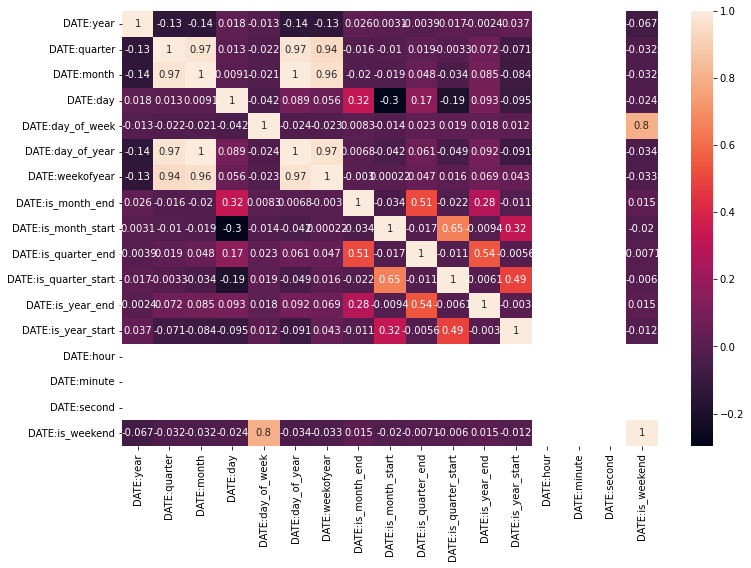

In [14]:
Time_df = train.iloc[:,[-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1]]
plt.figure(figsize=[12,8])
sns.heatmap(Time_df.corr(),annot=True )

The above output shows the number of rows and columns for train and test dataset. We have 7 variables in the train dataset, 7 independent variables and 1 dependent variable. In the test dataset, we have 7 independent variables.

We can observe the first five rows from our data set by using the head() method from the pandas library.

The SampleSubmission.csv gives us an example of what our submission file should look like. This file will contain the unique id column formed by combining date and balance amount columns. 

In [17]:
# View the submission file
ss.head(10)

,ID,Bank Charges,Bill-Payments,Cash-Pickup,Cell Phone and Airtime,Cheque-Payment,Deposit,Donations,General Purchases,Insurance,Interest,Internet and IT Services,Loan Repayment,Merchant-Payment,Money-Transfer,Professional services,Reversal,Salary and wages,Savings and Investments,Shopping,"Transport, Travel, and Logistics"
0,2014-02-28 00:00:00X3000000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2014-02-28 00:00:00X7500000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2014-03-08 00:00:00X4500002863,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2014-03-08 00:00:00X6000002863,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2014-03-08 00:00:00X6000005726,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2014-03-14 00:00:00X14500000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2014-03-14 00:00:00X19000000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2014-05-18 00:00:00X2100000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2014-07-01 00:00:00X8600000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2014-07-15 00:00:00X11200023226,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2. Understand the dataset

Let's look at a bar graph of the train data.

<AxesSubplot:>

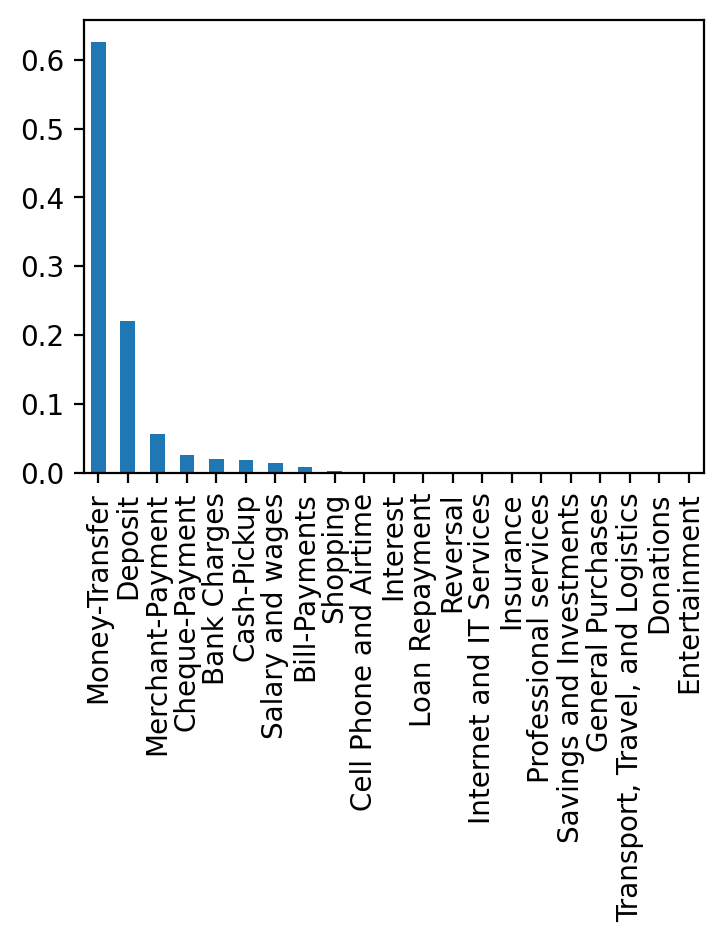

In [18]:
# Show Categoy support
fig,ax=plt.subplots(dpi=200, figsize=(4,3))
#ax.set_xticks(rotation=90)
train.Category.value_counts(normalize=True).plot.bar(ax=ax)

Looks like we have a class imbalance and low support for most of the categories

If you want to learn how to handle missing data in your dataset, we recommend you read [How to Handle Missing Data with Python](https://machinelearningmastery.com/handle-missing-data-python/) by Jason Brownlee.

For more information you can visit the link below.

[Why you need to explore your data and how you can start](https://https://medium.com/analytics-vidhya/why-you-need-to-explore-your-data-how-you-can-start-13de6f29c8c1)

Encode the target labels to values to show a correlation matrix.

In [19]:
# Use a dictionary comprehension and zip to create a dictionary for all the categories in the train data
labels_train = train['Category'].astype('category').cat.categories.tolist()
replace_map_train = {'Category' : {k: v for k,v in zip(labels_train,list(range(1,len(labels_train)+1)))}}
print("Train data: ", replace_map_train)

Train data:  {'Category': {'Bank Charges': 1, 'Bill-Payments': 2, 'Cash-Pickup': 3, 'Cell Phone and Airtime': 4, 'Cheque-Payment': 5, 'Deposit': 6, 'Donations': 7, 'Entertainment': 8, 'General Purchases': 9, 'Insurance': 10, 'Interest': 11, 'Internet and IT Services': 12, 'Loan Repayment': 13, 'Merchant-Payment': 14, 'Money-Transfer': 15, 'Professional services': 16, 'Reversal': 17, 'Salary and wages': 18, 'Savings and Investments': 19, 'Shopping': 20, 'Transport, Travel, and Logistics': 21}}


In [20]:
# Create a copy to use for the correlation matrix (as it only accepts numerical data)
train_data_corr = train.copy()

In [21]:
# Replace the categories with the numerical equivalents from the dictionary
train_data_corr.replace(replace_map_train, inplace=True)

## Correlation matrix

In [22]:
train_data_corr.corr()

,Account_NO,CHQ.NO.,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,Category,DATE:year,DATE:quarter,DATE:month,DATE:day,DATE:day_of_week,DATE:day_of_year,DATE:weekofyear,DATE:is_month_end,DATE:is_month_start,DATE:is_quarter_end,DATE:is_quarter_start,DATE:is_year_end,DATE:is_year_start,DATE:hour,DATE:minute,DATE:second,DATE:is_weekend
Account_NO,1.000000,0.351361,0.121602,0.076127,0.033356,0.336006,-0.265008,-0.065804,-0.068533,0.008501,-0.113446,-0.068273,-0.074793,-0.004008,-0.015653,0.004631,-0.008623,-0.015327,-0.027297,NaN,NaN,NaN,0.018080
CHQ.NO.,0.351361,1.000000,-0.067754,NaN,0.382381,-0.340006,0.291509,-0.134659,-0.187592,0.042450,-0.050299,-0.185665,-0.182784,-0.021296,0.007239,-0.007076,0.030280,0.000439,0.030280,NaN,NaN,NaN,-0.091676
WITHDRAWAL AMT,0.121602,-0.067754,1.000000,-0.088483,0.118660,0.169217,-0.106178,-0.041831,-0.038566,-0.002606,0.000669,-0.038821,-0.037919,-0.009353,0.000011,-0.003927,-0.007857,-0.002942,-0.004299,NaN,NaN,NaN,0.042446
DEPOSIT AMT,0.076127,NaN,-0.088483,1.000000,0.024830,0.179585,-0.068979,-0.058551,-0.057386,0.005205,0.002165,-0.056920,-0.055921,-0.010505,-0.011312,0.009474,-0.013595,-0.006137,-0.005639,NaN,NaN,NaN,0.004331
BALANCE AMT,0.033356,0.382381,0.118660,0.024830,1.000000,0.135700,0.122995,0.018131,0.022375,-0.026547,0.022833,0.019774,0.010290,-0.020976,0.001561,0.008569,-0.020451,-0.000944,-0.006391,NaN,NaN,NaN,0.059530
Category,0.336006,-0.340006,0.169217,0.179585,0.135700,1.000000,0.268021,-0.069641,-0.069002,0.037635,-0.072773,-0.065939,-0.067415,0.009505,0.000481,-0.006491,0.008212,-0.006338,0.005102,NaN,NaN,NaN,-0.012151
DATE:year,-0.265008,0.291509,-0.106178,-0.068979,0.122995,0.268021,1.000000,-0.133695,-0.138406,0.018379,-0.012953,-0.135706,-0.131171,0.025647,0.003143,-0.003878,0.016965,-0.002380,0.037398,NaN,NaN,NaN,-0.066802
DATE:quarter,-0.065804,-0.134659,-0.041831,-0.058551,0.018131,-0.069641,-0.133695,1.000000,0.973897,0.012702,-0.021797,0.971115,0.943631,-0.015501,-0.010001,0.019462,-0.003339,0.072077,-0.071173,NaN,NaN,NaN,-0.032116
DATE:month,-0.068533,-0.187592,-0.038566,-0.057386,0.022375,-0.069002,-0.138406,0.973897,1.000000,0.009136,-0.021186,0.996769,0.964464,-0.019581,-0.018547,0.047960,-0.033670,0.085282,-0.083665,NaN,NaN,NaN,-0.032358
DATE:day,0.008501,0.042450,-0.002606,0.005205,-0.026547,0.037635,0.018379,0.012702,0.009136,1.000000,-0.042169,0.089108,0.056235,0.324423,-0.296951,0.167518,-0.193790,0.093272,-0.095371,NaN,NaN,NaN,-0.023867


We can see that not many things are correlated with Category, so it seems like we don't have enough data.

We need to drop empty rows if there are any.

In [23]:
train = train.dropna(how='all')
test = test.dropna(how='all')

In [24]:
# We can also use the .isnull() method to check for empty values
print('Missing values for Train:', train.isnull().sum())
print('')
print('Missing values for Test:', test.isnull().sum())

Missing values for Train: DATE                         0
TRANSACTION DETAILS       1651
Account_NO                   0
CHQ.NO.                  57586
WITHDRAWAL AMT               0
DEPOSIT AMT                  0
BALANCE AMT                  0
Category                  1771
DATE:year                    0
DATE:quarter                 0
DATE:month                   0
DATE:day                     0
DATE:day_of_week             0
DATE:day_of_year             0
DATE:weekofyear              0
DATE:is_month_end            0
DATE:is_month_start          0
DATE:is_quarter_end          0
DATE:is_quarter_start        0
DATE:is_year_end             0
DATE:is_year_start           0
DATE:time                    0
DATE:hour                    0
DATE:minute                  0
DATE:second                  0
DATE:is_weekend              0
DATE:day_part            57974
dtype: int64

Missing values for Test: DATE                         0
TRANSACTION DETAILS          0
Account_NO                   0
CHQ.N

Looks like we need to remove the missing categories, they won't help with the model.

CHQ.NO. is mostuly null.

Since TRANSACTION DETAILS is text and the bag of words models can only work on strings we'll need to covert nans to ''

### Empty entries

Remove null categories

In [25]:
train = train[train.Category.notnull()]

In [26]:
# fill na
train['TRANSACTION DETAILS'] = train['TRANSACTION DETAILS'].fillna('')

### Transaction details

Let's take a look at the text column

In [27]:
# get the max words in
train[train['TRANSACTION DETAILS'].notnull()]['TRANSACTION DETAILS'].str.split(' ').apply(len).max()

1

In [28]:
train[train['TRANSACTION DETAILS'].notnull()]['TRANSACTION DETAILS'].str.split(' ')

0        [NEFT/FDRL401249529/INDIAFORENSIC]
1        [NEFT/FDRL401249532/INDIAFORENSIC]
2        [NEFT/FDRL401249534/INDIAFORENSIC]
3        [NEFT/FDRL401249590/INDIAFORENSIC]
4        [NEFT/FDRL401249531/INDIAFORENSIC]
                        ...                
57969       [INDIAFORENSICNFSSETT02-03-201]
57970       [INDIAFORENSICNFSSETT02-03-201]
57971       [INDIAFORENSICNFSSETT02-03-201]
57972       [INDIAFORENSICNFSSETT03-03-201]
57973       [INDIAFORENSICNFSSETT02-03-201]
Name: TRANSACTION DETAILS, Length: 56203, dtype: object

Seems like there are not spaces between the words. This is often done to save space description

<AxesSubplot:ylabel='Frequency'>

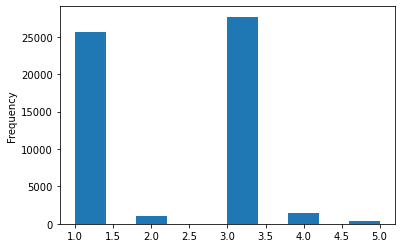

In [29]:
# put spaces between the / since those look like spaces
train[train['TRANSACTION DETAILS'].notnull()]['TRANSACTION DETAILS'].str.split('/').apply(len).plot.hist()

In [29]:
train[train['TRANSACTION DETAILS'].notnull()]['TRANSACTION DETAILS'].str.split('/')

0        [NEFT, FDRL401249529, INDIAFORENSIC]
1        [NEFT, FDRL401249532, INDIAFORENSIC]
2        [NEFT, FDRL401249534, INDIAFORENSIC]
3        [NEFT, FDRL401249590, INDIAFORENSIC]
4        [NEFT, FDRL401249531, INDIAFORENSIC]
                         ...                 
57969         [INDIAFORENSICNFSSETT02-03-201]
57970         [INDIAFORENSICNFSSETT02-03-201]
57971         [INDIAFORENSICNFSSETT02-03-201]
57972         [INDIAFORENSICNFSSETT03-03-201]
57973         [INDIAFORENSICNFSSETT02-03-201]
Name: TRANSACTION DETAILS, Length: 56203, dtype: object

We probably should explore this and other special chariters to parse out the words. But that's out of scope for this Tut

## 3. Data preparation for machine learning

Before you train the model for prediction, you need to perform data [cleaning](https://www.dataquest.io/blog/machine-learning-preparing-data/) and [preprocessing](https://towardsdatascience.com/data-preprocessing-concepts-fa946d11c825). This is a very important step; your model will not perform well without these steps.

The first step is to separate the independent variables and target() from the training data. Then transform the target values from the object data type into numerical.


## 4. Feature Creation, Model Building and Experiments
A portion of the training data set will be used to evaluate our models and find the best one that performs well before using it in the test dataset.

We'll need to create features from the text, numerical, and time data and combine them in a machine readable way.


*    [Introduction to Feature Selection methods with an example (or how to select the right variables?)](https://https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/)
*   [The 5 Feature Selection Algorithms every Data Scientist should know](https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2)
*   [How to Choose a Feature Selection Method For Machine Learning](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)
*   [Feature Selection Techniques in Machine Learning with Python](https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e)

In [28]:
train.columns

Index(['DATE', 'TRANSACTION DETAILS', 'Account_NO', 'CHQ.NO.',
       'WITHDRAWAL AMT', 'DEPOSIT AMT', 'BALANCE AMT', 'Category', 'DATE:year',
       'DATE:quarter', 'DATE:month', 'DATE:day', 'DATE:day_of_week',
       'DATE:day_of_year', 'DATE:weekofyear', 'DATE:is_month_end',
       'DATE:is_month_start', 'DATE:is_quarter_end', 'DATE:is_quarter_start',
       'DATE:is_year_end', 'DATE:is_year_start', 'DATE:time', 'DATE:hour',
       'DATE:minute', 'DATE:second', 'DATE:is_weekend', 'DATE:day_part'],
      dtype='object')

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56203 entries, 0 to 57973
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DATE                   56203 non-null  datetime64[ns]
 1   TRANSACTION DETAILS    56203 non-null  object        
 2   Account_NO             56203 non-null  int64         
 3   CHQ.NO.                377 non-null    float64       
 4   WITHDRAWAL AMT         56203 non-null  float64       
 5   DEPOSIT AMT            56203 non-null  float64       
 6   BALANCE AMT            56203 non-null  float64       
 7   Category               56203 non-null  object        
 8   DATE:year              56203 non-null  int64         
 9   DATE:quarter           56203 non-null  int64         
 10  DATE:month             56203 non-null  int64         
 11  DATE:day               56203 non-null  int64         
 12  DATE:day_of_week       56203 non-null  int64         
 13  D

In [31]:
# # Split the training data
feature_cols = ['TRANSACTION DETAILS','CHQ.NO.','WITHDRAWAL AMT','DEPOSIT AMT','BALANCE AMT']
X_train, X_val, y_train, y_val = train_test_split(train[feature_cols], train['Category'], test_size=0.3, random_state=101)

Only 30% of the train dataset will be used for evaluating the models. 

There are many models to choose from such as 

*   [K Nearest Neighbors](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn)
*   [Logistic Regression](https://machinelearningmastery.com/logistic-regression-tutorial-for-machine-learning/)
*   [Random Forest](https://www.datacamp.com/community/tutorials/random-forests-classifier-python)
*   [XGBoost](https://www.datacamp.com/community/tutorials/xgboost-in-python)


Fit models

In [32]:
# make sure validation set has all the categories as training set
print('validation set is missing cols {}'.format(set(y_train.unique()) - set(y_val.unique())))
missing_cols = list(set(y_train.unique()) - set(y_val.unique()))

validation set is missing cols {'Entertainment', 'General Purchases', 'Donations'}


Well need to include this column in a dummy matrix for the log loss metric to work, since both the train and val set need to have the same shape

Let's try a decision tree first

In [33]:
# Creating a Decision tree classifier with a pipeline

### Feature processing and creation on numerical features
numeric_features = ['WITHDRAWAL AMT','DEPOSIT AMT','BALANCE AMT']
numeric_transformer = StandardScaler()

### Feature creation on text features
text_features = 'TRANSACTION DETAILS'
text_transformer = Pipeline(steps=[('vectorizer',TfidfVectorizer(analyzer='char_wb',ngram_range=(1,9),max_df=0.9)),
                                    ('best',TruncatedSVD(3))
                                  ])
### Todo: Feature creation on Date 


### make reusable preprocessing step
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("text", text_transformer, text_features),
    ],
    sparse_threshold=0
)

### combine with a classifier
model_dtree = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", DecisionTreeClassifier(max_depth=5, random_state=101,
                                     max_features = None, min_samples_leaf=8))]
)


# Training the model on the training dataset
model_dtree.fit(X_train, y_train)

# Predict
y_pred = model_dtree.predict(X_val)
# create dummy matrix of the true
y_val_dummies = pd.get_dummies(pd.concat([y_val, pd.Series([col for col in missing_cols])],ignore_index=True)).iloc[:-len(missing_cols)][model_dtree.classes_]
y_pred_poba = model_dtree.predict_proba(X_val)

# Calculate accuracy
print("ACCURACY OF THE MODEL: ", accuracy_score(y_val, y_pred), 'The log loss of the model:',log_loss(y_val_dummies,y_pred_poba))

# Classification report
print(classification_report(y_val, y_pred))

ACCURACY OF THE MODEL:  0.8627602158828065 The log loss of the model: 1.1566320515166826
                                  precision    recall  f1-score   support

                    Bank Charges       0.00      0.00      0.00       338
                   Bill-Payments       0.90      0.52      0.66       134
                     Cash-Pickup       0.51      0.48      0.49       332
          Cell Phone and Airtime       0.00      0.00      0.00        34
                  Cheque-Payment       0.85      0.82      0.83       401
                         Deposit       0.98      0.99      0.98      3749
                       Insurance       0.00      0.00      0.00         6
                        Interest       0.00      0.00      0.00        16
        Internet and IT Services       0.00      0.00      0.00         9
                  Loan Repayment       0.00      0.00      0.00        24
                Merchant-Payment       0.42      0.49      0.45       963
                  Mone

Let's try random forest with 100 estimators

In [69]:
from sklearn.ensemble import RandomForestClassifier

# Re-use preprocessor but change the model
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", RandomForestClassifier(random_state=101))]
)
 
# Training the model on the training dataset
clf.fit(X_train, y_train)
 
# Performing predictions on the test dataset
y_pred = clf.predict(X_val)
y_val_dummies = pd.get_dummies(pd.concat([y_val, pd.Series([col for col in missing_cols])],ignore_index=True)).iloc[:-len(missing_cols)][clf.classes_]
y_pred_poba = clf.predict_proba(X_val)
# Calculate accuracy
print("ACCURACY OF THE MODEL: ", accuracy_score(y_val, y_pred), 'The log loss of the model:',log_loss(y_val_dummies,y_pred_poba))

# Classification report
print(classification_report(y_val, y_pred))


ACCURACY OF THE MODEL:  0.9596702449439535 The log loss of the model: 0.18288544587777736
                                  precision    recall  f1-score   support

                    Bank Charges       0.86      0.95      0.90       338
                   Bill-Payments       0.99      0.75      0.85       134
                     Cash-Pickup       0.48      0.98      0.64       332
          Cell Phone and Airtime       1.00      0.85      0.92        34
                  Cheque-Payment       0.90      1.00      0.94       401
                         Deposit       1.00      1.00      1.00      3749
                       Insurance       1.00      0.83      0.91         6
                        Interest       1.00      1.00      1.00        16
        Internet and IT Services       1.00      1.00      1.00         9
                  Loan Repayment       1.00      1.00      1.00        24
                Merchant-Payment       0.91      0.98      0.94       963
                  Mon

In [35]:
from catboost import CatBoostClassifier

# Re-use preprocessor but change the model
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier",CatBoostClassifier(iterations=10,random_state=101))]
)

# Training the model on the training dataset
clf.fit(X_train, y_train)
 
# Performing predictions on the test dataset
y_pred = clf.predict(X_val)
y_val_dummies = pd.get_dummies(pd.concat([y_val, pd.Series([col for col in missing_cols])],ignore_index=True)).iloc[:-len(missing_cols)][clf.classes_]
y_pred_poba = clf.predict_proba(X_val)
# Calculate accuracy
print("ACCURACY OF THE MODEL: ", accuracy_score(y_val, y_pred), 'The log loss of the model:',log_loss(y_val_dummies,y_pred_poba))

# Classification report
print(classification_report(y_val, y_pred))

Learning rate set to 0.5
0:	learn: 0.5688360	total: 229ms	remaining: 2.06s
1:	learn: 0.9146871	total: 336ms	remaining: 1.34s
2:	learn: 0.4383916	total: 416ms	remaining: 971ms
3:	learn: 0.3462819	total: 514ms	remaining: 771ms
4:	learn: 0.2937486	total: 607ms	remaining: 607ms
5:	learn: 0.2648028	total: 706ms	remaining: 471ms
6:	learn: 0.2484148	total: 830ms	remaining: 356ms
7:	learn: 0.2383911	total: 954ms	remaining: 239ms
8:	learn: 0.2165075	total: 1.12s	remaining: 124ms
9:	learn: 0.2065310	total: 1.28s	remaining: 0us
ACCURACY OF THE MODEL:  0.9098511357570725 The log loss of the model: 0.5422529279493834
                                  precision    recall  f1-score   support

                    Bank Charges       0.45      0.72      0.56       338
                   Bill-Payments       0.89      0.86      0.87       134
                     Cash-Pickup       0.53      0.83      0.65       332
          Cell Phone and Airtime       0.66      0.62      0.64        34
                 

In [103]:
from sklearn.svm import SVC

# Re-use preprocessor but change the model
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier",SVC(kernel= "rbf",C= 2, probability=True))]
)
 
# Training the model on the training dataset
clf.fit(X_train, y_train)
 
# Performing predictions on the test dataset
y_pred = clf.predict(X_val)
y_val_dummies = pd.get_dummies(pd.concat([y_val, pd.Series([col for col in missing_cols])],ignore_index=True)).iloc[:-len(missing_cols)][clf.classes_]
y_pred_poba = clf.predict_proba(X_val)
# Calculate accuracy
print("ACCURACY OF THE MODEL: ", accuracy_score(y_val, y_pred), 'The log loss of the model:',log_loss(y_val_dummies,y_pred_poba))

# Classification report
print(classification_report(y_val, y_pred))

ACCURACY OF THE MODEL:  0.8801969040982148 The log loss of the model: 0.307262399883494
                                  precision    recall  f1-score   support

                    Bank Charges       0.00      0.00      0.00       338
                   Bill-Payments       0.00      0.00      0.00       134
                     Cash-Pickup       0.00      0.00      0.00       332
          Cell Phone and Airtime       0.00      0.00      0.00        34
                  Cheque-Payment       0.97      0.69      0.80       401
                         Deposit       1.00      0.99      0.99      3749
                       Insurance       0.00      0.00      0.00         6
                        Interest       0.00      0.00      0.00        16
        Internet and IT Services       0.00      0.00      0.00         9
                  Loan Repayment       0.00      0.00      0.00        24
                Merchant-Payment       0.70      0.38      0.49       963
                  Money

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

# Re-use preprocessor but change the model
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier",GradientBoostingClassifier(n_estimators=600, max_depth=6,learning_rate=0.1,random_state=42))]
)
 
# Training the model on the training dataset
clf.fit(X_train, y_train)
 
# Performing predictions on the test dataset
y_pred = clf.predict(X_val)
y_val_dummies = pd.get_dummies(pd.concat([y_val, pd.Series([col for col in missing_cols])],ignore_index=True)).iloc[:-len(missing_cols)][clf.classes_]
y_pred_poba = clf.predict_proba(X_val)
# Calculate accuracy
print("ACCURACY OF THE MODEL: ", accuracy_score(y_val, y_pred), 'The log loss of the model:',log_loss(y_val_dummies,y_pred_poba))

# Classification report
print(classification_report(y_val, y_pred))

ACCURACY OF THE MODEL:  0.9958484075677599 The log loss of the model: 0.06909579336027742
                                  precision    recall  f1-score   support

                    Bank Charges       0.99      0.97      0.98       338
                   Bill-Payments       0.98      0.97      0.97       134
                     Cash-Pickup       0.98      0.98      0.98       332
          Cell Phone and Airtime       0.96      0.79      0.87        34
                  Cheque-Payment       0.99      1.00      1.00       401
                         Deposit       1.00      1.00      1.00      3749
               General Purchases       0.00      0.00      0.00         0
                       Insurance       1.00      0.83      0.91         6
                        Interest       1.00      0.94      0.97        16
        Internet and IT Services       1.00      1.00      1.00         9
                  Loan Repayment       0.88      0.96      0.92        24
                Merch

In [51]:
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, ratio = 1.0)
X_res, Y_res = sm.fit_sample(X_train, Y_train)

# Re-use preprocessor but change the model
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", lgb.LGBMClassifier())]
)
 
# Training the model on the training dataset
clf.fit(X_train, y_train)
 
# Performing predictions on the test dataset
y_pred = clf.predict(X_val)
y_val_dummies = pd.get_dummies(pd.concat([y_val, pd.Series([col for col in missing_cols])],ignore_index=True)).iloc[:-len(missing_cols)][clf.classes_]
y_pred_poba = clf.predict_proba(X_val)
# Calculate accuracy
print("ACCURACY OF THE MODEL: ", accuracy_score(y_val, y_pred), 'The log loss of the model:',log_loss(y_val_dummies,y_pred_poba))

# Classification report
print(classification_report(y_val, y_pred))

ACCURACY OF THE MODEL:  0.8564735187711287 The log loss of the model: 4.955495544809785
                                  precision    recall  f1-score   support

                    Bank Charges       0.67      0.02      0.05       338
                   Bill-Payments       0.50      0.01      0.01       134
                     Cash-Pickup       0.19      0.47      0.27       332
          Cell Phone and Airtime       0.00      0.00      0.00        34
                  Cheque-Payment       0.50      0.43      0.46       401
                         Deposit       1.00      0.93      0.96      3749
                       Insurance       0.00      0.00      0.00         6
                        Interest       0.00      0.00      0.00        16
        Internet and IT Services       0.00      0.00      0.00         9
                  Loan Repayment       0.00      0.00      0.00        24
                Merchant-Payment       0.43      0.50      0.46       963
                  Money

### 5. Making the first submission

Let’s see how the model performs on the competition test data set provided and how we rank on the competition leaderboard.

First we make predictions on the competition test data set.

In [112]:
# Get the predicted result for the test Data
predictions = pd.DataFrame(clf.predict_proba(test),columns=clf.classes_,index=ss.ID)

In [113]:
predictions

,Bank Charges,Bill-Payments,Cash-Pickup,Cell Phone and Airtime,Cheque-Payment,Deposit,Donations,Entertainment,General Purchases,Insurance,Interest,Internet and IT Services,Loan Repayment,Merchant-Payment,Money-Transfer,Professional services,Reversal,Salary and wages,Savings and Investments,Shopping,"Transport, Travel, and Logistics"
ID,,,,,,,,,,,,,,,,,,,,,
2014-02-28 00:00:00X3000000000,9.350169e-04,0.000150,4.167784e-03,4.244868e-03,4.868842e-04,1.263564e-03,3.570732e-04,3.587699e-04,3.546350e-04,3.378454e-04,3.425809e-04,3.371580e-04,3.276766e-04,8.798128e-01,1.028460e-01,5.072074e-04,2.102499e-03,7.452928e-05,3.508828e-04,2.840149e-04,3.586847e-04
2014-02-28 00:00:00X7500000000,2.813424e-03,0.000428,1.569053e-02,1.000933e-02,1.145931e-03,4.315729e-03,9.833025e-04,8.470856e-04,8.356872e-04,7.939576e-04,8.036440e-04,7.929198e-04,7.648251e-04,4.640222e-01,4.839004e-01,1.195822e-03,7.640970e-03,4.976454e-04,1.022142e-03,6.497017e-04,8.463420e-04
2014-03-08 00:00:00X4500002863,3.201603e-02,0.597288,2.657073e-02,4.491999e-03,2.589447e-01,1.157945e-02,1.252038e-03,1.493934e-03,1.924380e-03,2.289172e-03,5.409605e-04,7.182637e-04,5.698843e-04,1.266141e-02,6.959312e-03,1.299045e-03,2.934495e-02,1.055131e-03,1.587330e-03,5.993013e-03,1.420012e-03
2014-03-08 00:00:00X6000002863,9.220996e-08,1.000000,1.154546e-07,6.887623e-08,4.939422e-09,6.047851e-09,4.003954e-09,5.053009e-09,5.513630e-09,2.088377e-08,7.561950e-10,8.533637e-09,5.777282e-09,2.483091e-08,1.696476e-09,1.643903e-08,6.230351e-08,5.333295e-10,9.203228e-09,1.850605e-08,4.346269e-09
2014-03-08 00:00:00X6000005726,3.201603e-02,0.597288,2.657073e-02,4.491999e-03,2.589447e-01,1.157945e-02,1.252038e-03,1.493934e-03,1.924380e-03,2.289172e-03,5.409605e-04,7.182637e-04,5.698843e-04,1.266141e-02,6.959312e-03,1.299045e-03,2.934495e-02,1.055131e-03,1.587330e-03,5.993013e-03,1.420012e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-16 00:00:00X2455635722,1.756977e-03,0.000038,4.406590e-04,5.158796e-03,4.473647e-05,2.177017e-04,9.905167e-05,9.872298e-05,1.042521e-04,8.421443e-05,6.016846e-05,8.412678e-05,7.060981e-05,9.613844e-01,2.935083e-02,1.531392e-04,4.779481e-04,4.971938e-06,9.679364e-05,1.758740e-04,9.847599e-05
2021-04-16 00:00:00X2443135400,1.756977e-03,0.000038,4.406590e-04,5.158796e-03,4.473647e-05,2.177017e-04,9.905167e-05,9.872298e-05,1.042521e-04,8.421443e-05,6.016846e-05,8.412678e-05,7.060981e-05,9.613844e-01,2.935083e-02,1.531392e-04,4.779481e-04,4.971938e-06,9.679364e-05,1.758740e-04,9.847599e-05
2021-04-16 00:00:00X6412233,6.749844e-04,0.000062,3.301124e-03,2.607206e-04,2.374257e-04,8.338621e-04,1.841413e-04,1.832207e-04,1.964841e-04,1.611064e-04,1.425487e-04,1.605056e-04,1.425941e-04,9.620857e-01,2.815980e-02,3.012316e-04,6.174019e-04,1.782592e-03,1.808217e-04,1.489178e-04,1.832822e-04


Save results in the CSV file.

In [114]:
# Create the submission csv file
predictions.to_csv('37TH_submission.csv', index = True)

We named our submission file a first_submission.csv. Now we can upload it to the Zindi competition page by clicking the submit button and selecting the file to upload. You also have an option to add comments for each submission.

## More Tips
- Use date to generate more features
- Thorough EDA and domain knowledge sourcing
- Try char embeddings for descriptions 
- Dataset balancing - oversampling, undersampling, SMOTE...
- Ensembling of models 
- Cross-validation: Group folds, Stratified...